In [2]:
from multi_query import Multiquery


Starting CTGov Algorithm


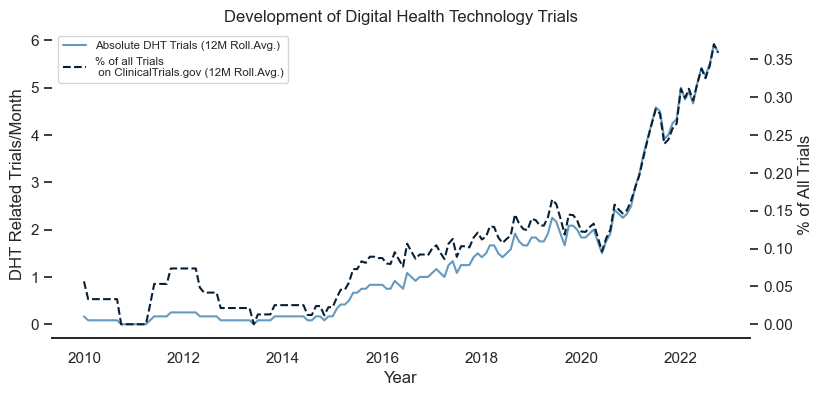

Starting PubMed Algorithm
Total number of publications in 2000/1: 1
Total number of publications in 2000/2: 2
Total number of publications in 2000/3: 5
Total number of publications in 2000/4: 1
Total number of publications in 2000/5: 4
Total number of publications in 2000/6: 10
Total number of publications in 2000/7: 4
Total number of publications in 2000/8: 6
Total number of publications in 2000/9: 4
Total number of publications in 2000/10: 2
Total number of publications in 2000/11: 3
Total number of publications in 2000/12: 4
Total number of publications in 2001/1: 2
Total number of publications in 2001/2: 11
Total number of publications in 2001/3: 4
Total number of publications in 2001/4: 11
Total number of publications in 2001/5: 1
Total number of publications in 2001/6: 3
Total number of publications in 2001/7: 4
Total number of publications in 2001/8: 6
Total number of publications in 2001/9: 8
Total number of publications in 2001/10: 13
Total number of publications in 2001/11: 8

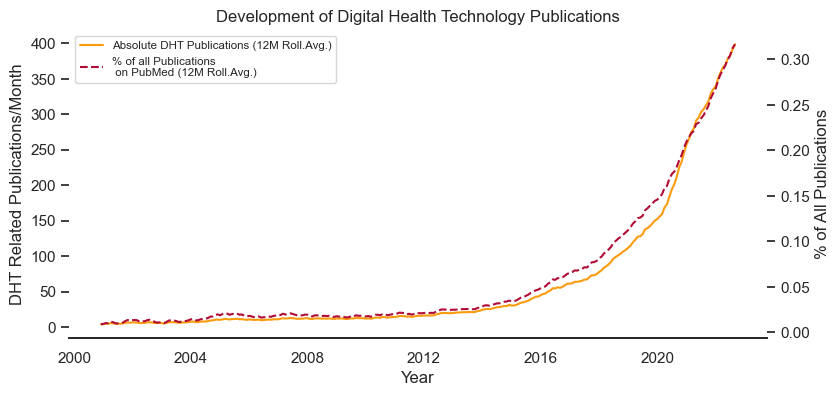

Starting Twitter Algorithm


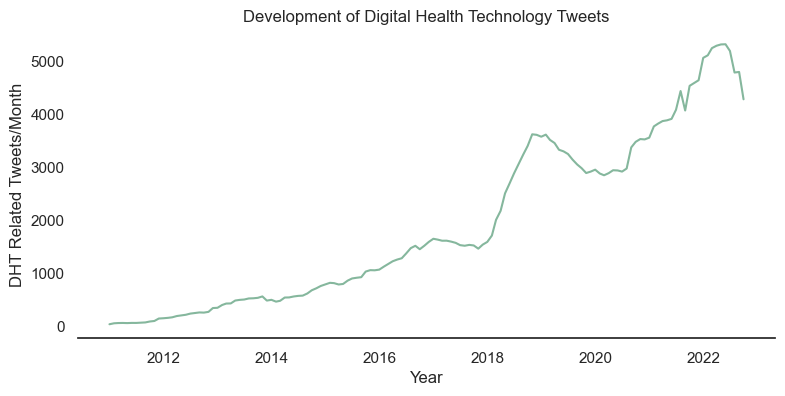

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'Graphs/DHT'


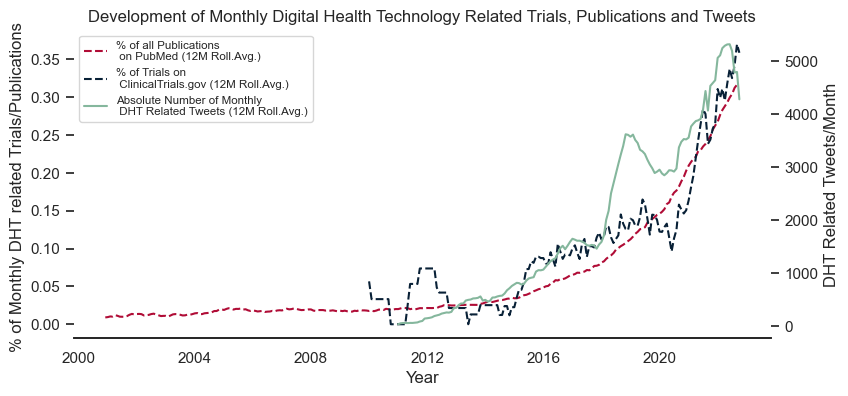

In [3]:
myquery = Multiquery()
myquery.query_monthly_combination_result( search_string = "digital health technology",
                                            search_nice_name= "Digital Health Technology",
    search_akronym_for_graph= "DHT",
    norm_query= "ALL",
    start_month = "2000-01-01",
    end_month = "2022-10-01",
    show_rolling_average = True,
    window_rolling_average = 12,
    twitter = True)

In [3]:
ctgov_df = myquery.ctgov_df
import pandas as pd

In [4]:
pd.to_datetime(arg =ctgov_df.month, format ="%Y-%m")

0     2000-01-31
1     2000-02-29
2     2000-03-31
3     2000-04-30
4     2000-05-31
         ...    
268   2022-05-31
269   2022-06-30
270   2022-07-31
271   2022-08-31
272   2022-09-30
Name: month, Length: 273, dtype: datetime64[ns]

In [5]:
myquery.pubmed_df

,month,pub_count,norm_pub_count,pub_rate,pub_count_rolling_average,pub_rate_rolling_average
0,2000-01-01,7,39504,0.017720,NaN,NaN
1,2000-02-01,18,39544,0.045519,NaN,NaN
2,2000-03-01,18,48138,0.037392,NaN,NaN
3,2000-04-01,12,40161,0.029880,NaN,NaN
4,2000-05-01,25,40132,0.062294,NaN,NaN
...,...,...,...,...,...,...
268,2022-05-01,636,122100,0.520885,787.583333,0.622969
269,2022-06-01,680,131792,0.515965,763.250000,0.603963
270,2022-07-01,570,130505,0.436765,734.833333,0.585789
271,2022-08-01,558,123891,0.450396,705.916667,0.564369


In [6]:
myquery.pubmed_df.iloc[:,1:]

,pub_count,norm_pub_count,pub_rate,pub_count_rolling_average,pub_rate_rolling_average
0,7,39504,0.017720,NaN,NaN
1,18,39544,0.045519,NaN,NaN
2,18,48138,0.037392,NaN,NaN
3,12,40161,0.029880,NaN,NaN
4,25,40132,0.062294,NaN,NaN
...,...,...,...,...,...
268,636,122100,0.520885,787.583333,0.622969
269,680,131792,0.515965,763.250000,0.603963
270,570,130505,0.436765,734.833333,0.585789
271,558,123891,0.450396,705.916667,0.564369


In [7]:
multi_df = pd.merge(left=myquery.ctgov_df, how="outer", right = myquery.twitter_df, on= "month")
comb_df = pd.concat([multi_df, myquery.pubmed_df.iloc[:,1:],], axis=1)

In [8]:
super_df = pd.concat([multi_df, myquery.pubmed_df.iloc[:,1:],], axis=1)

In [9]:
super_df.rename({"month":"time"}, axis =1, inplace = True)
super_df

,time,trial_count,reference_total_trial_count,trial_rate,trial_count_rolling_average,trial_rate_rolling_average,tweet_count,tweet_count_rolling_average,pub_count,norm_pub_count,pub_rate,pub_count_rolling_average,pub_rate_rolling_average
0,2000-01-31,0,354,0.000000,NaN,NaN,NaN,NaN,7,39504,0.017720,NaN,NaN
1,2000-02-29,0,149,0.000000,NaN,NaN,NaN,NaN,18,39544,0.045519,NaN,NaN
2,2000-03-31,0,162,0.000000,NaN,NaN,NaN,NaN,18,48138,0.037392,NaN,NaN
3,2000-04-30,0,148,0.000000,NaN,NaN,NaN,NaN,12,40161,0.029880,NaN,NaN
4,2000-05-31,0,179,0.000000,NaN,NaN,NaN,NaN,25,40132,0.062294,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-05-31,20,2754,0.726216,12.666667,0.464761,928.0,687.750000,636,122100,0.520885,787.583333,0.622969
269,2022-06-30,17,2742,0.619985,12.916667,0.476999,1011.0,726.250000,680,131792,0.515965,763.250000,0.603963
270,2022-07-31,12,2356,0.509338,13.083333,0.486777,624.0,738.000000,570,130505,0.436765,734.833333,0.585789
271,2022-08-31,15,2462,0.609261,13.916667,0.520754,816.0,757.833333,558,123891,0.450396,705.916667,0.564369


In [15]:
ts_df = super_df[["time", "trial_rate_rolling_average", "tweet_count_rolling_average", "pub_rate_rolling_average"]]
ts_df.fillna(0, inplace = True)

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [20]:
multi_ts = TimeSeriesData(ts_df)
single_ts = TimeSeriesData(time = ts_df.time, value = ts_df.trial_rate_rolling_average)

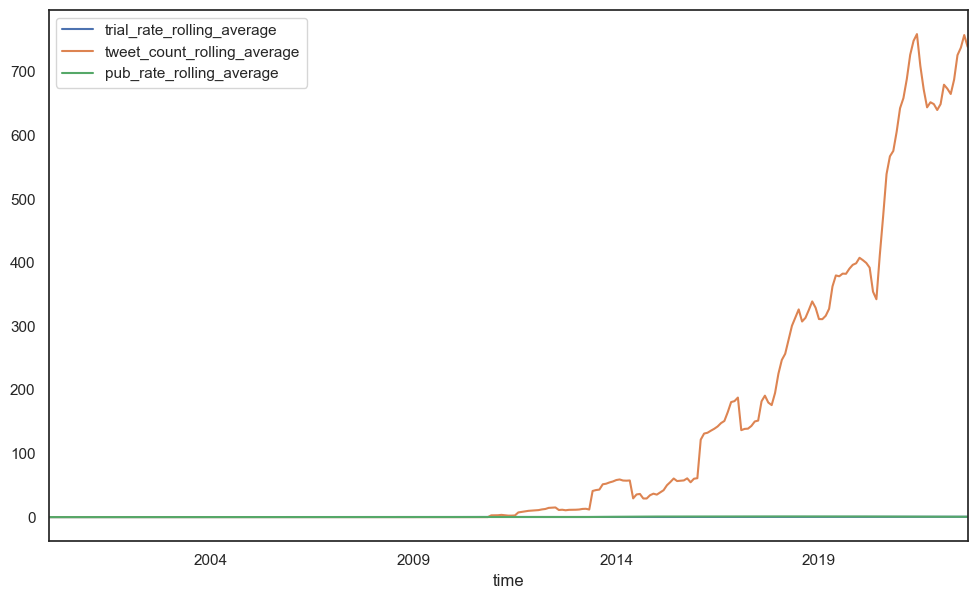

In [18]:
multi_ts.plot()
plt.show()

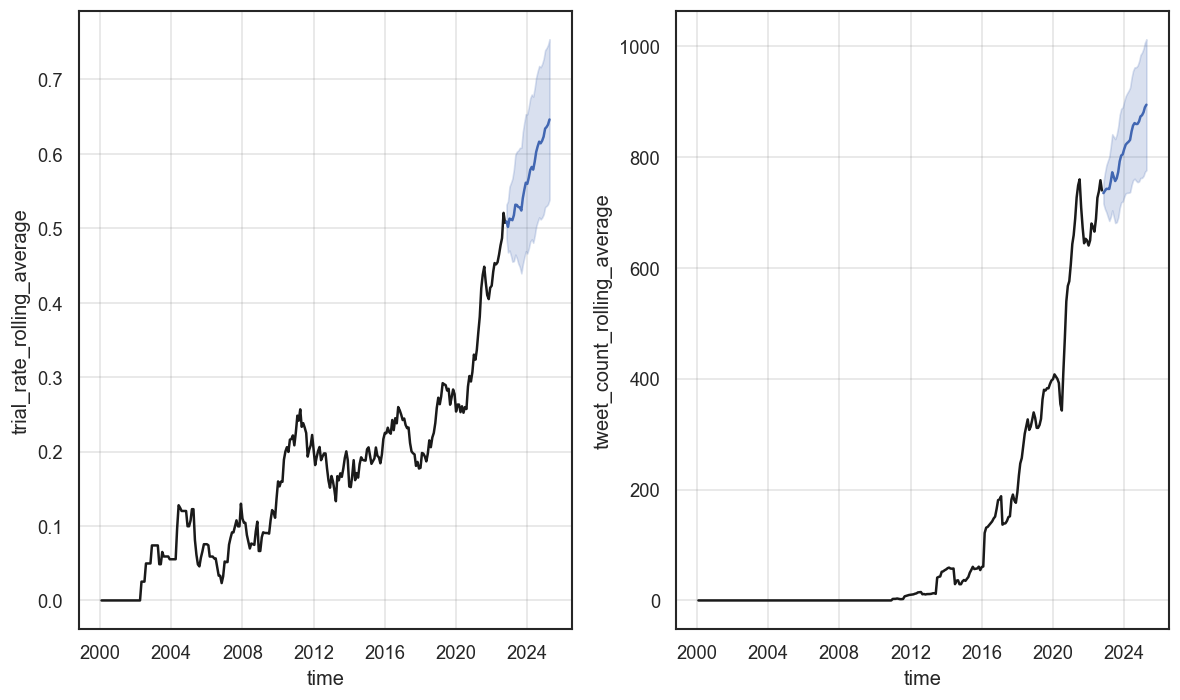

In [19]:
# Use VAR model to forecast this multivariate time series
from kats.models.var import VARModel, VARParams

params = VARParams()
m = VARModel(multi_ts, params)
m.fit()
fcst = m.predict(steps=30)

m.plot()
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


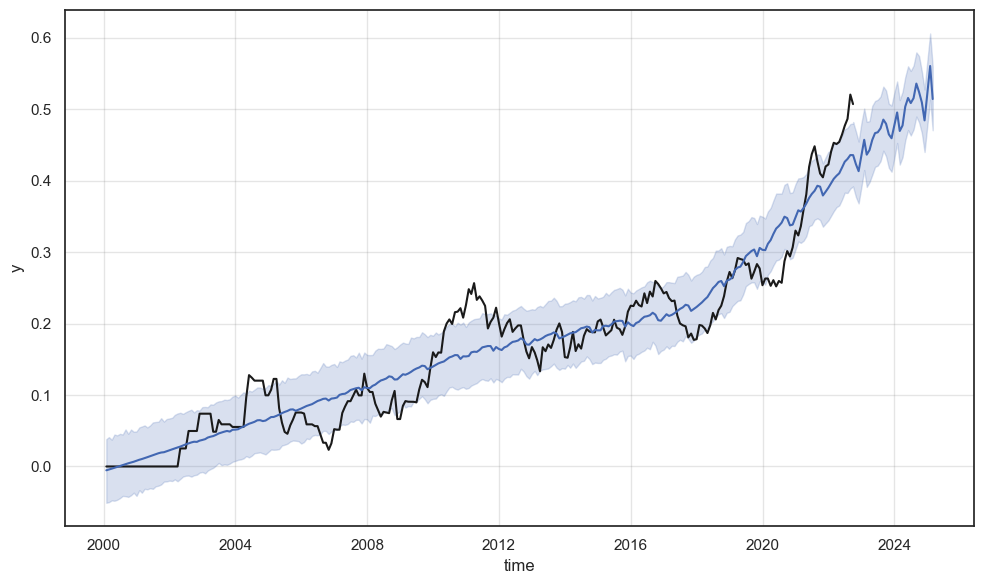

In [28]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(single_ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS", include_history = True)

# plot to visualize
m.plot()
plt.show()

<AxesSubplot:xlabel='time', ylabel='y'>

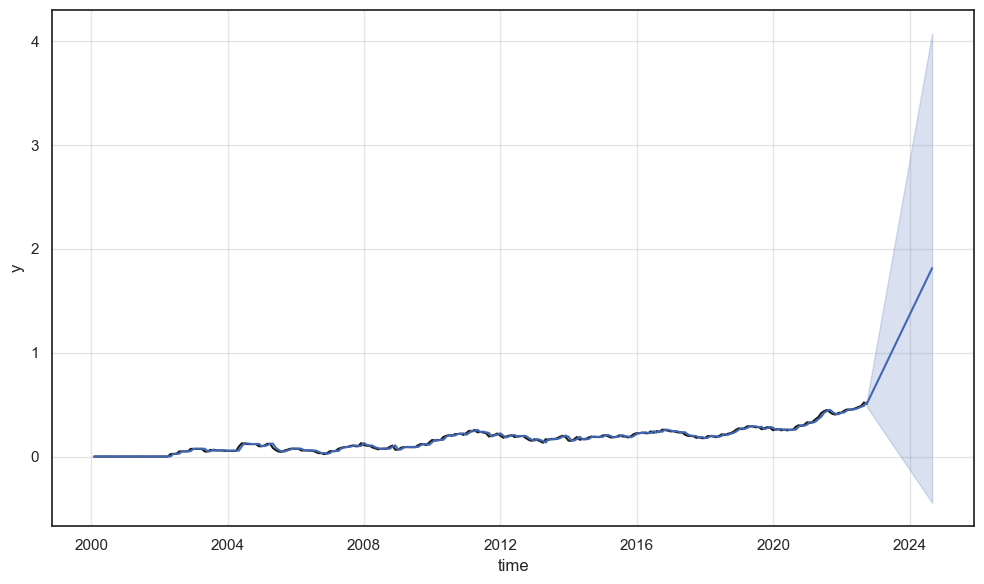

In [30]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="add",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=single_ts, 
    params=params)

m.fit()
fcst = m.predict(steps=700, include_history=True, alpha = 0.1)
m.plot()